In [1]:
from pycaret.utils import version
version()

'2.2.3'

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('D://DS//Fraud1.csv')
df.head()

,age,profession,martial_status,education,house,loan,gender,ava_bal,assets,car,bike,fraud
0,52,2,2,1,1,1,0,34315,49472,1,0,0
1,48,4,1,1,1,0,0,49104,29378,1,0,1
2,23,6,0,0,0,0,1,1683,40290,1,0,1
3,49,7,2,1,1,1,1,22363,9430,0,0,1
4,60,1,2,2,1,0,0,30493,23056,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             99999 non-null  int64
 1   profession      99999 non-null  int64
 2   martial_status  99999 non-null  int64
 3   education       99999 non-null  int64
 4   house           99999 non-null  int64
 5   loan            99999 non-null  int64
 6   gender          99999 non-null  int64
 7   ava_bal         99999 non-null  int64
 8   assets          99999 non-null  int64
 9   car             99999 non-null  int64
 10  bike            99999 non-null  int64
 11  fraud           99999 non-null  int64
dtypes: int64(12)
memory usage: 9.2 MB


In [5]:
from pycaret.classification import *
model = setup(df,target='fraud',session_id=123,log_experiment=True,experiment_name='Fraud_Detection',normalize = True)

,Description,Value
0,session_id,123
1,Target,fraud
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(99999, 12)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5056,0.5066,0.4936,0.5052,0.4993,0.0113,0.0113,3.2530
et,Extra Trees Classifier,0.5051,0.5065,0.4941,0.5046,0.4993,0.0102,0.0102,3.5350
ada,Ada Boost Classifier,0.5034,0.5031,0.5107,0.5027,0.5066,0.0068,0.0068,1.1760
lightgbm,Light Gradient Boosting Machine,0.5028,0.5035,0.5142,0.5021,0.5080,0.0056,0.0056,0.5600
dt,Decision Tree Classifier,0.5023,0.5023,0.5041,0.5017,0.5029,0.0046,0.0046,0.4270
knn,K Neighbors Classifier,0.5015,0.5034,0.5001,0.5009,0.5005,0.0030,0.0030,1.7160
xgboost,Extreme Gradient Boosting,0.5013,0.5016,0.5038,0.5007,0.5022,0.0026,0.0026,3.5300
gbc,Gradient Boosting Classifier,0.5010,0.5004,0.4963,0.5003,0.4982,0.0019,0.0019,4.3820
nb,Naive Bayes,0.5006,0.5016,0.5241,0.5002,0.5115,0.0012,0.0012,0.0570
qda,Quadratic Discriminant Analysis,0.5001,0.5000,0.4389,0.4959,0.4374,0.0000,-0.0011,0.1040


In [7]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4973,0.5000,0.5011,0.4967,0.4989,-0.0054,-0.0054
1,0.4881,0.4866,0.4677,0.4870,0.4772,-0.0238,-0.0238
2,0.5037,0.5015,0.4817,0.5033,0.4923,0.0074,0.0074
3,0.4937,0.5014,0.4725,0.4928,0.4825,-0.0126,-0.0126
4,0.5043,0.5003,0.4917,0.5038,0.4977,0.0085,0.0085
5,0.4931,0.4961,0.4937,0.4926,0.4931,-0.0137,-0.0137
6,0.4990,0.4980,0.4971,0.4984,0.4978,-0.0020,-0.0020
7,0.5056,0.5041,0.4851,0.5052,0.4950,0.0111,0.0111
8,0.5071,0.5061,0.5026,0.5066,0.5046,0.0143,0.0143
9,0.5039,0.5036,0.4834,0.5036,0.4933,0.0078,0.0078


In [8]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5133,0.5133,0.5275,0.5124,0.5198,0.0266,0.0266
1,0.4984,0.4984,0.4897,0.4978,0.4937,-0.0032,-0.0032
2,0.5044,0.5044,0.4997,0.5039,0.5018,0.0088,0.0088
3,0.5041,0.5041,0.5023,0.5036,0.5029,0.0083,0.0083
4,0.5076,0.5076,0.5072,0.5070,0.5071,0.0151,0.0151
5,0.5036,0.5036,0.5077,0.5030,0.5053,0.0072,0.0072
6,0.5014,0.5014,0.5063,0.5008,0.5036,0.0029,0.0029
7,0.4879,0.4879,0.4989,0.4876,0.4931,-0.0243,-0.0243
8,0.4976,0.4976,0.4991,0.4970,0.4981,-0.0049,-0.0049
9,0.5046,0.5046,0.5029,0.5042,0.5035,0.0093,0.0093


In [9]:
catb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4986,0.4957,0.4943,0.4980,0.4961,-0.0029,-0.0029
1,0.4897,0.4966,0.4989,0.4893,0.4941,-0.0206,-0.0206
2,0.5016,0.5029,0.5109,0.5010,0.5059,0.0032,0.0032
3,0.5026,0.5030,0.4977,0.5020,0.4999,0.0051,0.0051
4,0.4947,0.4924,0.4863,0.4940,0.4901,-0.0106,-0.0106
5,0.5007,0.5064,0.4946,0.5001,0.4973,0.0014,0.0014
6,0.5013,0.5041,0.5000,0.5007,0.5004,0.0026,0.0026
7,0.5086,0.5059,0.5226,0.5078,0.5151,0.0172,0.0172
8,0.4963,0.4963,0.4954,0.4957,0.4956,-0.0074,-0.0074
9,0.4992,0.5000,0.5037,0.4987,0.5012,-0.0016,-0.0016


In [10]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [11]:
models(type='ensemble').index.tolist()

['rf', 'ada', 'gbc', 'et', 'xgboost', 'lightgbm', 'catboost']

In [12]:
ensembled_models = compare_models(models(type='ensemble').index.tolist())

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5056,0.5066,0.4936,0.5052,0.4993,0.0113,0.0113,3.4240
et,Extra Trees Classifier,0.5051,0.5065,0.4941,0.5046,0.4993,0.0102,0.0102,3.1630
ada,Ada Boost Classifier,0.5034,0.5031,0.5107,0.5027,0.5066,0.0068,0.0068,1.1370
lightgbm,Light Gradient Boosting Machine,0.5028,0.5035,0.5142,0.5021,0.5080,0.0056,0.0056,0.3800
xgboost,Extreme Gradient Boosting,0.5013,0.5016,0.5038,0.5007,0.5022,0.0026,0.0026,3.5760
gbc,Gradient Boosting Classifier,0.5010,0.5004,0.4963,0.5003,0.4982,0.0019,0.0019,4.0170
catboost,CatBoost Classifier,0.4993,0.5003,0.5004,0.4987,0.4996,-0.0014,-0.0014,26.6540


In [13]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4976,0.5000,0.5017,0.4970,0.4994,-0.0048,-0.0048
1,0.4881,0.4866,0.4677,0.4870,0.4772,-0.0238,-0.0238
2,0.5037,0.5015,0.4817,0.5033,0.4923,0.0074,0.0074
3,0.4936,0.5014,0.4725,0.4927,0.4824,-0.0129,-0.0129
4,0.5041,0.5003,0.4917,0.5037,0.4976,0.0083,0.0083
5,0.4931,0.4961,0.4937,0.4926,0.4931,-0.0137,-0.0137
6,0.4991,0.4980,0.4971,0.4986,0.4979,-0.0017,-0.0017
7,0.5063,0.5041,0.4851,0.5060,0.4953,0.0125,0.0125
8,0.5070,0.5061,0.5026,0.5065,0.5045,0.0140,0.0140
9,0.5041,0.5036,0.4834,0.5037,0.4934,0.0081,0.0081


In [14]:
tuned_catboost = tune_model(catb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4940,0.4921,0.4846,0.4933,0.4889,-0.0120,-0.0120
1,0.4920,0.4957,0.4923,0.4914,0.4919,-0.0160,-0.0160
2,0.5056,0.5013,0.4974,0.5051,0.5012,0.0111,0.0111
3,0.4981,0.5038,0.4748,0.4975,0.4859,-0.0038,-0.0038
4,0.5059,0.5011,0.4874,0.5055,0.4963,0.0117,0.0117
5,0.5016,0.4999,0.4814,0.5010,0.4910,0.0031,0.0031
6,0.5069,0.5073,0.4989,0.5064,0.5026,0.0137,0.0137
7,0.5106,0.5036,0.5103,0.5100,0.5102,0.0211,0.0211
8,0.4996,0.4927,0.4774,0.4990,0.4879,-0.0009,-0.0009
9,0.5082,0.5043,0.4986,0.5079,0.5032,0.0164,0.0164


In [15]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5094,0.5081,0.4047,0.5112,0.4518,0.0186,0.0190
1,0.4987,0.4964,0.3993,0.4977,0.4431,-0.0028,-0.0029
2,0.5001,0.5028,0.3919,0.4995,0.4392,0.0000,0.0000
3,0.5084,0.5049,0.3999,0.5100,0.4483,0.0166,0.0170
4,0.4990,0.4995,0.3890,0.4980,0.4368,-0.0023,-0.0023
5,0.5067,0.5109,0.4053,0.5077,0.4508,0.0132,0.0135
6,0.5006,0.4970,0.4005,0.5000,0.4447,0.0009,0.0009
7,0.4981,0.4914,0.3882,0.4969,0.4358,-0.0040,-0.0041
8,0.5033,0.5014,0.3827,0.5036,0.4349,0.0063,0.0065
9,0.4949,0.4926,0.3839,0.4928,0.4316,-0.0104,-0.0106


In [16]:
bagged_catb = ensemble_model(catb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4930,0.4949,0.4868,0.4923,0.4896,-0.0140,-0.0140
1,0.4971,0.4977,0.5089,0.4966,0.5027,-0.0057,-0.0057
2,0.4996,0.5044,0.4963,0.4990,0.4976,-0.0009,-0.0009
3,0.4984,0.5042,0.4808,0.4978,0.4892,-0.0032,-0.0032
4,0.4991,0.4951,0.4814,0.4985,0.4898,-0.0018,-0.0018
5,0.4981,0.5002,0.4800,0.4975,0.4886,-0.0038,-0.0038
6,0.5023,0.5079,0.4880,0.5018,0.4948,0.0045,0.0045
7,0.5076,0.5041,0.4931,0.5072,0.5001,0.0151,0.0151
8,0.4944,0.4978,0.4814,0.4937,0.4875,-0.0112,-0.0112
9,0.5012,0.5011,0.4934,0.5007,0.4970,0.0024,0.0024


In [17]:
boosted_catb = ensemble_model(catb, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5074,0.5053,0.5057,0.5069,0.5063,0.0149,0.0149
1,0.5110,0.5092,0.5143,0.5104,0.5123,0.0220,0.0220
2,0.5054,0.5102,0.5043,0.5049,0.5046,0.0109,0.0109
3,0.5064,0.5079,0.5020,0.5059,0.5039,0.0128,0.0128
4,0.5031,0.4947,0.5060,0.5026,0.5043,0.0063,0.0063
5,0.4997,0.5044,0.4960,0.4991,0.4976,-0.0006,-0.0006
6,0.5043,0.5052,0.4946,0.5038,0.4991,0.0085,0.0086
7,0.5056,0.5069,0.5040,0.5050,0.5045,0.0111,0.0111
8,0.5013,0.4993,0.4920,0.5007,0.4963,0.0026,0.0026
9,0.4952,0.4885,0.4971,0.4947,0.4959,-0.0096,-0.0096


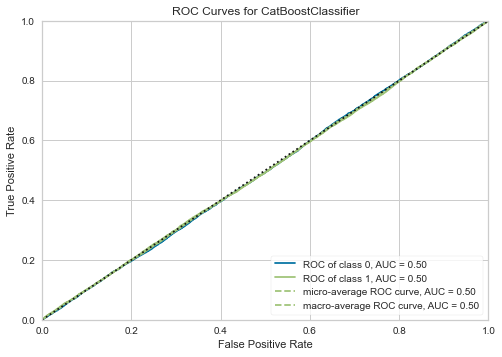

In [18]:
plot_model(catb)

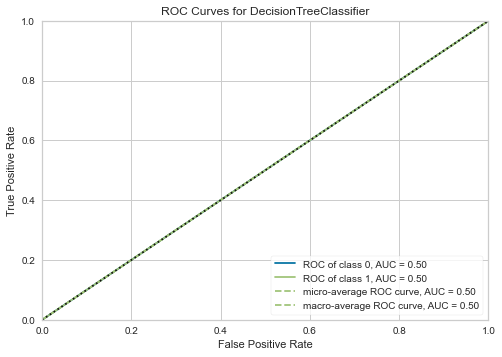

In [19]:
plot_model(dt)

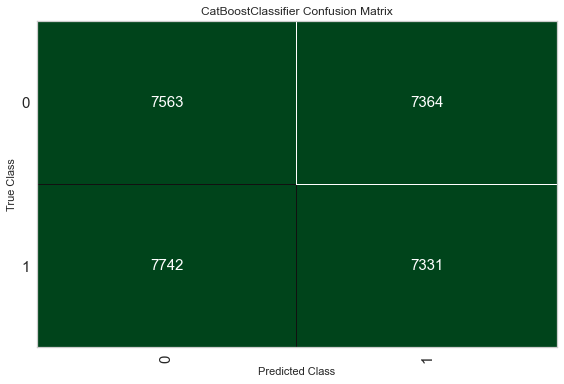

In [20]:
plot_model(catb, plot = 'confusion_matrix')

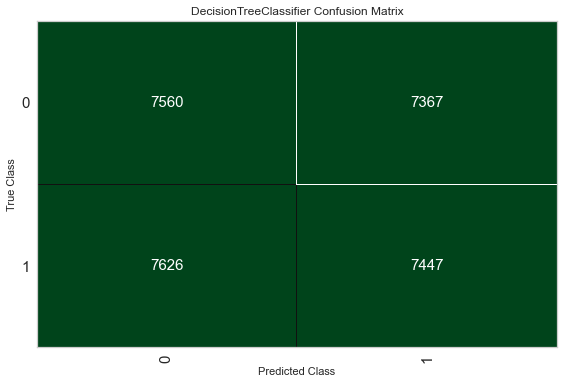

In [21]:
plot_model(dt, plot = 'confusion_matrix')

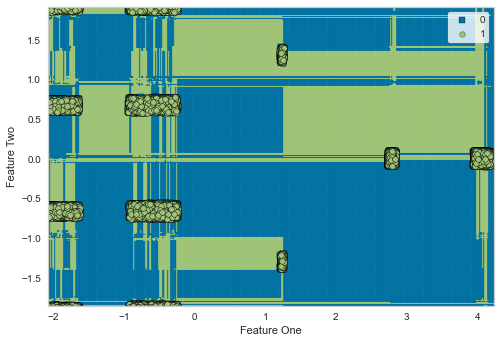

In [22]:
plot_model(catb, plot = 'boundary')

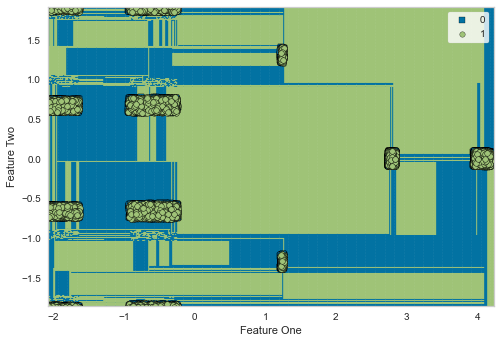

In [23]:
plot_model(dt, plot = 'boundary')

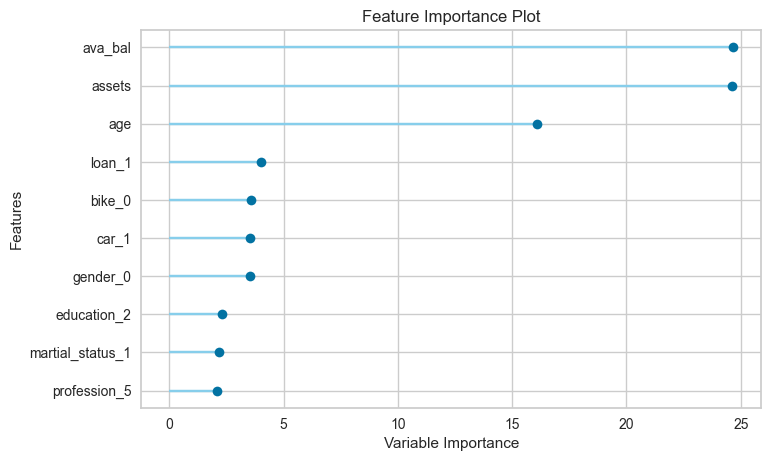

In [24]:
plot_model(catb, plot = 'feature')

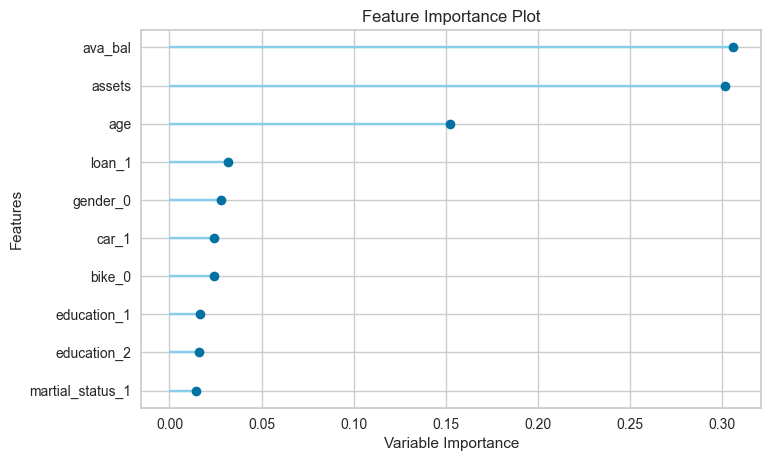

In [25]:
plot_model(dt, plot = 'feature')

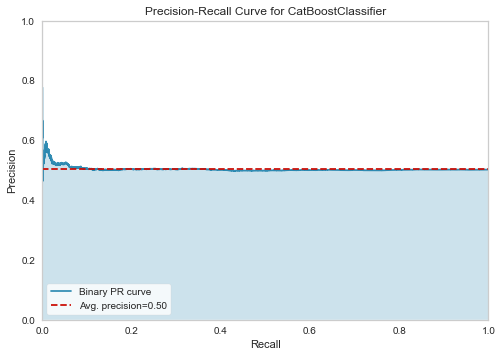

In [26]:
plot_model(catb, plot = 'pr')

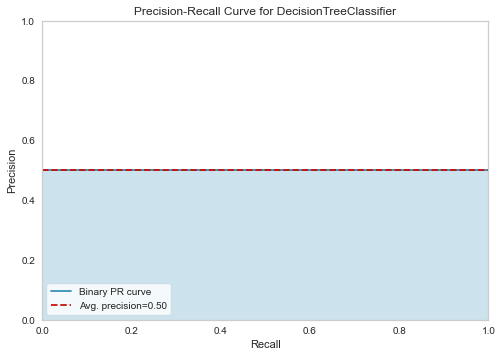

In [27]:
plot_model(dt, plot = 'pr')

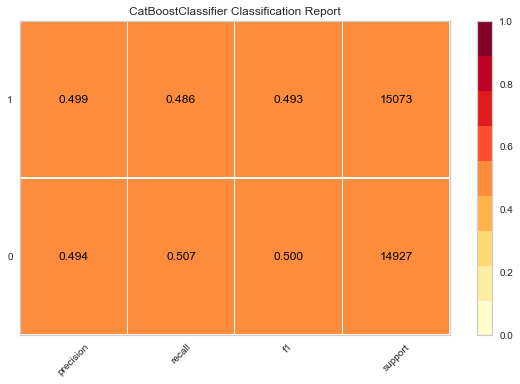

In [28]:
plot_model(catb, plot = 'class_report')

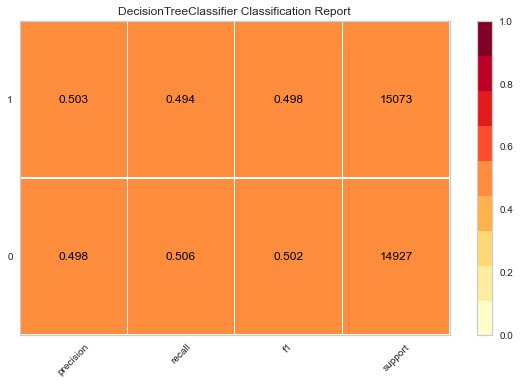

In [29]:
plot_model(dt, plot = 'class_report')

In [30]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [31]:
catboost = create_model('catboost', cross_validation=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4965,0.4984,0.4864,0.4989,0.4925,-0.007,-0.007


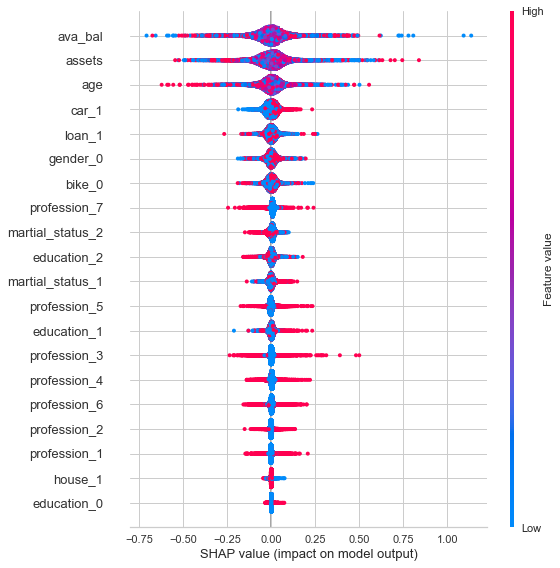

In [32]:
interpret_model(catboost)

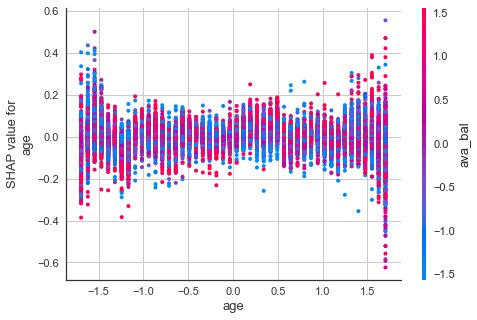

In [33]:
interpret_model(catboost, plot = 'correlation')

In [34]:
interpret_model(catboost, plot = 'reason', observation = 12)

In [35]:
best = automl(optimize = 'Recall')
best

GaussianNB(priors=None, var_smoothing=1e-09)

In [36]:
pred_holdouts = predict_model(catb)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.4965,0.4984,0.4864,0.4989,0.4925,-0.0070,-0.0070


,age,ava_bal,assets,profession_1,profession_2,profession_3,profession_4,profession_5,profession_6,profession_7,...,education_1,education_2,house_1,loan_1,gender_0,car_1,bike_0,fraud,Label,Score
0,-0.637553,-0.398021,-1.289334,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1,0,0.5266
1,-0.637553,0.680375,0.982002,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1,1,0.5242
2,1.325152,-0.315461,-1.066313,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1,1,0.5307
3,0.117334,1.034161,1.001558,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,0.5303
4,1.249664,-1.206783,-0.061538,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,1,0.5343


In [37]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='fraud',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                 ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='fraud')),
                 ('fix_perfect', Remove_100(target='fraud')),
                 ('clean_names', Clean_Colum_Names()),
                 ('fea

In [38]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='fraud',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='fraud')),
                ('fix_perfect', Remove_100(target='fraud')),
                ('clean_names', Clean_C

In [39]:

from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

DataTypes_Auto_infer(categorical_features=[], display_types=True,
                     features_todrop=[], id_columns=[],
                     ml_usecase='classification', numerical_features=[],
                     target='fraud', time_features=[])